In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [4]:
X_train,X_test = X_train/255.0,X_test/255.0

In [5]:
model = tf.keras.Sequential([keras.layers.Flatten(),
                             keras.layers.Dense(1024,activation=tf.nn.relu),
                            keras.layers.Dense(10,activation=tf.nn.softmax)])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [7]:
class myCallbac(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

In [8]:
callbacks = myCallbac()

In [9]:
history = model.fit(X_train,y_train,callbacks=[callbacks],epochs=10)

Epoch 1/10
60000/60000 [==============================] - 11s 183us/sample - loss: 0.4699 - acc: 0.8296
Epoch 2/10
60000/60000 [==============================] - 11s 180us/sample - loss: 0.3581 - acc: 0.8706
Epoch 3/10
60000/60000 [==============================] - 11s 182us/sample - loss: 0.3224 - acc: 0.8805
Epoch 4/10
60000/60000 [==============================] - 11s 182us/sample - loss: 0.2957 - acc: 0.8905
Epoch 5/10
60000/60000 [==============================] - 11s 183us/sample - loss: 0.2796 - acc: 0.8956
Epoch 6/10
59936/60000 [============================>.] - ETA: 0s - loss: 0.2634 - acc: 0.9021
Reached 90% accuracy so cancelling training!
60000/60000 [==============================] - 11s 181us/sample - loss: 0.2636 - acc: 0.9020


In [11]:
accuracies = history.history['acc']
loss = history.history['loss']

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

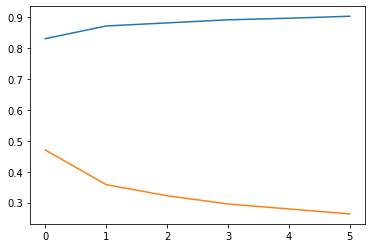

In [14]:
plt.plot(history.epoch,accuracies)
plt.plot(history.epoch,loss)